In [3]:
import os
import json
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
def unnormalised_best_subspan_em(
    prediction, ground_truths
) -> float:
    for ground_truth in ground_truths:
        if ground_truth.lower() in prediction.lower():
            return 1.0
    return 0.0

In [5]:
decore_filepath = "../predictions/musique_closed_book/pred_MuSiQue_DeCoReEntropy.json"
baseline_filepath = "../predictions/musique_closed_book/pred_MuSiQue_Baseline.json"
dola_filepath = "../predictions/musique_closed_book/pred_MuSiQue_DoLa.json"

decore_data = []
with open(decore_filepath, "r") as f:
    for line in f:
        decore_data += [json.loads(line)]

baseline_data = []
with open(baseline_filepath, "r") as f:
    for line in f:
        baseline_data += [json.loads(line)]

dola_data = []
with open(dola_filepath, "r") as f:
    for line in f:
        dola_data += [json.loads(line)]

decore_alphas_correct = []
decore_alphas_incorrect = []
decore_lengths_correct = []
decore_lengths_incorrect = []
for i in range(len(decore_data)):
    answers = [ans[0] for ans in decore_data[i]["answers"]]

    is_correct = unnormalised_best_subspan_em(decore_data[i]["predicted_answer"], answers)
    if is_correct:
        decore_alphas_correct += [decore_data[i]["alphas"]]
        decore_lengths_correct += [len(decore_data[i]["alphas"])]
    else:
        decore_alphas_incorrect += [decore_data[i]["alphas"]]
        decore_lengths_incorrect += [len(decore_data[i]["alphas"])]

baseline_alphas_correct = []
baseline_alphas_incorrect = []
baseline_lengths_correct = []
baseline_lengths_incorrect = []
for i in range(len(baseline_data)):
    answers = [ans[0] for ans in baseline_data[i]["answers"]]

    is_correct = unnormalised_best_subspan_em(baseline_data[i]["predicted_answer"], answers)
    if is_correct:
        baseline_alphas_correct += [baseline_data[i]["alphas"]]
        baseline_lengths_correct += [len(baseline_data[i]["alphas"])]
    else:
        baseline_alphas_incorrect += [baseline_data[i]["alphas"]]
        baseline_lengths_incorrect += [len(baseline_data[i]["alphas"])]

dola_alphas_correct = []
dola_alphas_incorrect = []
dola_lengths_correct = []
dola_lengths_incorrect = []
for i in range(len(dola_data)):
    answers = [ans[0] for ans in dola_data[i]["answers"]]

    is_correct = unnormalised_best_subspan_em(dola_data[i]["predicted_answer"], answers)
    if is_correct:
        dola_alphas_correct += [dola_data[i]["alphas"][0]]
        dola_lengths_correct += [len(dola_data[i]["alphas"][0])]
    else:
        dola_alphas_incorrect += [dola_data[i]["alphas"][0]]
        dola_lengths_incorrect += [len(dola_data[i]["alphas"][0])]

/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_61495/2286744433.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need

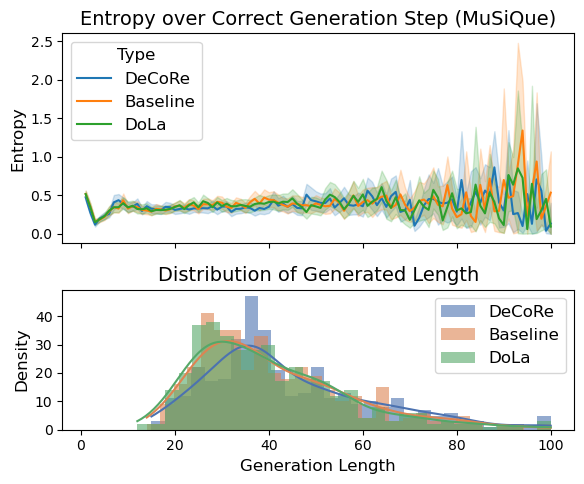

In [4]:
# Convert the data to a long-form DataFrame suitable for Seaborn
decore_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths_correct])
baseline_timesteps = np.concatenate([np.arange(1, length+1) for length in baseline_lengths_correct])
dola_timesteps = np.concatenate([np.arange(1, length+1) for length in dola_lengths_correct])
timesteps = np.concatenate((decore_timesteps, baseline_timesteps, dola_timesteps))

decore_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas_correct])
baseline_data_flat = np.concatenate([np.array(alphas) for alphas in baseline_alphas_correct])
dola_data_flat = np.concatenate([np.array(alphas) for alphas in dola_alphas_correct])

types = ['DeCoRe'] * len(decore_data_flat) + ['Baseline'] * len(baseline_data_flat) + ['DoLa'] * len(dola_data_flat)
data_flat = np.concatenate((decore_data_flat, baseline_data_flat, dola_data_flat))

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), sharex=True, gridspec_kw={'height_ratios': [3, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Entropy')
ax1.tick_params(axis='y')
ax1.set_title('Entropy over Correct Generation Step (MuSiQue)')

# Plot the histogram on the second subplot
sns.histplot(decore_lengths_correct, kde=True, bins=30, color='#4C72B0', ax=ax2, edgecolor=None, label='DeCoRe', alpha=0.6)
sns.histplot(baseline_lengths_correct, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Baseline', alpha=0.6)
sns.histplot(dola_lengths_correct, kde=True, bins=30, color='#55A868', ax=ax2, edgecolor=None, label='DoLa', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generated Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Save the figure as a PDF with settings suitable for ICLR publication
plt.savefig('musique_closed_book_llama3_8b_instruct_decore_entropy_alpha_correct_generation_step.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

In [5]:
def auec(entropy_values):
    return np.trapz(entropy_values, range(len(entropy_values)))

In [6]:
decore_auecs = []
for alphas in decore_alphas_correct:
    decore_auecs += [auec(alphas)]

baseline_auecs = []
for alphas in baseline_alphas_correct:
    baseline_auecs += [auec(alphas)]

dola_auecs = []
for alphas in dola_alphas_correct:
    dola_auecs += [auec(alphas)]


print("DeCoRe AUEC:", np.mean(decore_auecs))
print("Baseline AUEC:", np.mean(baseline_auecs))
print("DoLa AUEC:", np.mean(dola_auecs))

DeCoRe AUEC: 14.794037438326454
Baseline AUEC: 14.187043003966298
DoLa AUEC: 13.731494666674703


/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_61495/4257470723.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need

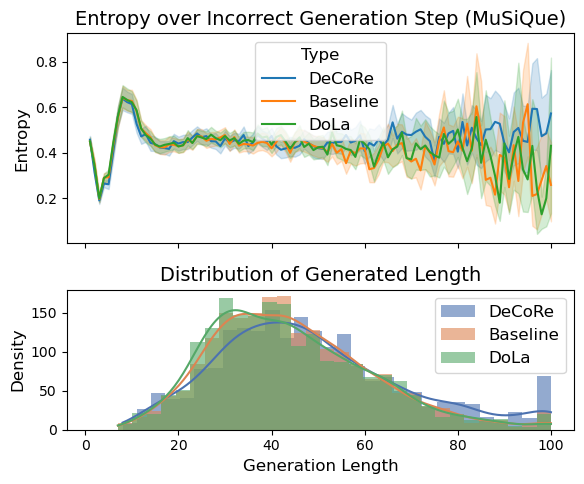

In [7]:
# Convert the data to a long-form DataFrame suitable for Seaborn
decore_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths_incorrect])
baseline_timesteps = np.concatenate([np.arange(1, length+1) for length in baseline_lengths_incorrect])
dola_timesteps = np.concatenate([np.arange(1, length+1) for length in dola_lengths_incorrect])
timesteps = np.concatenate((decore_timesteps, baseline_timesteps, dola_timesteps))

decore_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas_incorrect])
baseline_data_flat = np.concatenate([np.array(alphas) for alphas in baseline_alphas_incorrect])
dola_data_flat = np.concatenate([np.array(alphas) for alphas in dola_alphas_incorrect])

types = ['DeCoRe'] * len(decore_data_flat) + ['Baseline'] * len(baseline_data_flat) + ['DoLa'] * len(dola_data_flat)
data_flat = np.concatenate((decore_data_flat, baseline_data_flat, dola_data_flat))

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), sharex=True, gridspec_kw={'height_ratios': [3, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Entropy')
ax1.tick_params(axis='y')
ax1.set_title('Entropy over Incorrect Generation Step (MuSiQue)')

# Plot the histogram on the second subplot
sns.histplot(decore_lengths_incorrect, kde=True, bins=30, color='#4C72B0', ax=ax2, edgecolor=None, label='DeCoRe', alpha=0.6)
sns.histplot(baseline_lengths_incorrect, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Baseline', alpha=0.6)
sns.histplot(dola_lengths_incorrect, kde=True, bins=30, color='#55A868', ax=ax2, edgecolor=None, label='DoLa', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generated Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Save the figure as a PDF with settings suitable for ICLR publication
plt.savefig('musique_closed_book_llama3_8b_instruct_decore_entropy_alpha_incorrect_generation_step.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

In [8]:
decore_auecs = []
for alphas in decore_alphas_incorrect:
    decore_auecs += [auec(alphas)]

baseline_auecs = []
for alphas in baseline_alphas_incorrect:
    baseline_auecs += [auec(alphas)]

dola_auecs = []
for alphas in dola_alphas_incorrect:
    dola_auecs += [auec(alphas)]


print("DeCoRe AUEC:", np.mean(decore_auecs))
print("Baseline AUEC:", np.mean(baseline_auecs))
print("DoLa AUEC:", np.mean(dola_auecs))

DeCoRe AUEC: 21.320409255130517
Baseline AUEC: 19.424083910978915
DoLa AUEC: 19.320181717835894


/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_61495/3206514799.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need

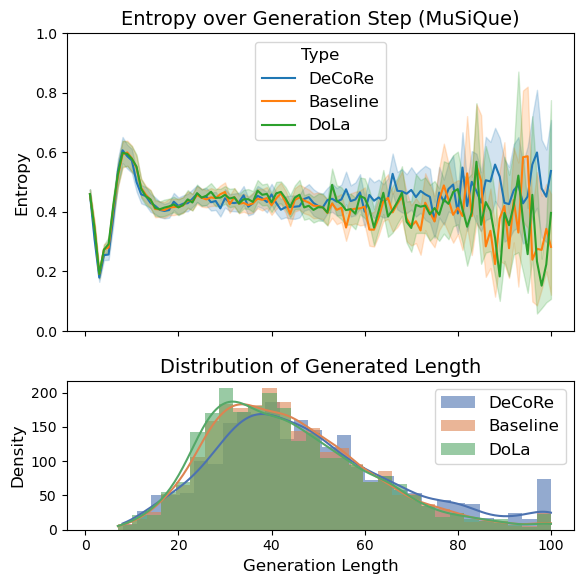

In [13]:
# Convert the data to a long-form DataFrame suitable for Seaborn
decore_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths_correct + decore_lengths_incorrect])
baseline_timesteps = np.concatenate([np.arange(1, length+1) for length in baseline_lengths_correct + baseline_lengths_incorrect])
dola_timesteps = np.concatenate([np.arange(1, length+1) for length in dola_lengths_correct + dola_lengths_incorrect])
timesteps = np.concatenate((decore_timesteps, baseline_timesteps, dola_timesteps))

decore_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas_correct + decore_alphas_incorrect])
baseline_data_flat = np.concatenate([np.array(alphas) for alphas in baseline_alphas_correct + baseline_alphas_incorrect])
dola_data_flat = np.concatenate([np.array(alphas) for alphas in dola_alphas_correct + dola_alphas_incorrect])

types = ['DeCoRe'] * len(decore_data_flat) + ['Baseline'] * len(baseline_data_flat) + ['DoLa'] * len(dola_data_flat)
data_flat = np.concatenate((decore_data_flat, baseline_data_flat, dola_data_flat))

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [4, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Entropy')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y')
ax1.set_title('Entropy over Generation Step (MuSiQue)')

# Plot the histogram on the second subplot
sns.histplot(decore_lengths_correct + decore_lengths_incorrect, kde=True, bins=30, color='#4C72B0', ax=ax2, edgecolor=None, label='DeCoRe', alpha=0.6)
sns.histplot(baseline_lengths_correct + baseline_lengths_incorrect, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Baseline', alpha=0.6)
sns.histplot(dola_lengths_correct + dola_lengths_incorrect, kde=True, bins=30, color='#55A868', ax=ax2, edgecolor=None, label='DoLa', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generated Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Save the figure as a PDF with settings suitable for ICLR publication
plt.savefig('musique_closed_book_llama3_8b_instruct_decore_entropy_alpha_all_generation_step.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

In [10]:
decore_auecs = []
for alphas in decore_alphas_incorrect:
    decore_auecs += [auec(alphas)]

baseline_auecs = []
for alphas in baseline_alphas_incorrect:
    baseline_auecs += [auec(alphas)]

dola_auecs = []
for alphas in dola_alphas_incorrect:
    dola_auecs += [auec(alphas)]


print("DeCoRe AUEC:", np.mean(decore_auecs))
print("Baseline AUEC:", np.mean(baseline_auecs))
print("DoLa AUEC:", np.mean(dola_auecs))

DeCoRe AUEC: 21.320409255130517
Baseline AUEC: 19.424083910978915
DoLa AUEC: 19.320181717835894


/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_61495/840132013.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need 

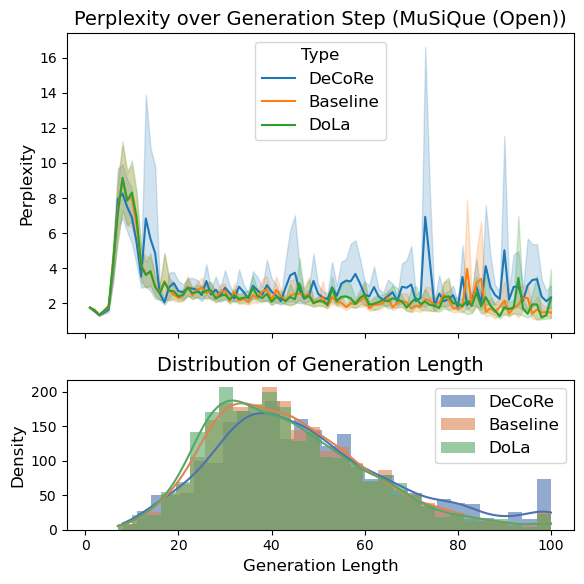

Baseline AUPC: 135.60188799796555
DoLa AUPC: 134.22467347089054
DeCoRe AUPC: 156.75100773465127
Baseline Average Perplexity: 3.3313003172125626
DoLa Average Perplexity: 3.3865729677416287
DeCoRe Average Perplexity: 3.49695207121432


In [15]:
def calculate_perplexity(alphas):
    return np.exp(alphas)


decore_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths_correct + decore_lengths_incorrect])
baseline_timesteps = np.concatenate([np.arange(1, length+1) for length in baseline_lengths_correct + baseline_lengths_incorrect])
dola_timesteps = np.concatenate([np.arange(1, length+1) for length in dola_lengths_correct + dola_lengths_incorrect])
timesteps = np.concatenate((decore_timesteps, baseline_timesteps, dola_timesteps))
decore_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas_correct + decore_alphas_incorrect])
baseline_data_flat = np.concatenate([np.array(alphas) for alphas in baseline_alphas_correct + baseline_alphas_incorrect])
dola_data_flat = np.concatenate([np.array(alphas) for alphas in dola_alphas_correct + dola_alphas_incorrect])

types = ['DeCoRe'] * len(decore_data_flat) + ['Baseline'] * len(baseline_data_flat) + ['DoLa'] * len(dola_data_flat)

data_flat = np.concatenate((decore_data_flat, baseline_data_flat, dola_data_flat))
data_flat = calculate_perplexity(data_flat)

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [4, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Perplexity')
# ax1.set_ylim(0, 1)
ax1.tick_params(axis='y')
ax1.set_title('Perplexity over Generation Step (MuSiQue (Open))')

# Plot the histogram on the second subplot
sns.histplot(decore_lengths_correct + decore_lengths_incorrect, kde=True, bins=30, color='#4C72B0', ax=ax2, edgecolor=None, label='DeCoRe', alpha=0.6)
sns.histplot(baseline_lengths_correct + baseline_lengths_incorrect, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Baseline', alpha=0.6)
sns.histplot(dola_lengths_correct + dola_lengths_incorrect, kde=True, bins=30, color='#55A868', ax=ax2, edgecolor=None, label='DoLa', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generation Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Save the figure as a PDF with settings suitable for ICLR publication
plt.savefig('musique_closed_book_perplexity.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

decore_aupcs = []
decore_avg_perplexities = []
for alphas in decore_alphas_correct + decore_alphas_incorrect:
    decore_perplexities = calculate_perplexity(alphas)
    decore_aupcs += [auec(decore_perplexities)]
    decore_avg_perplexities += [np.mean(decore_perplexities)]

baseline_aupcs = []
baseline_avg_perplexities = []
for alphas in baseline_alphas_correct + baseline_alphas_incorrect:
    baseline_perplexities = calculate_perplexity(alphas)
    baseline_aupcs += [auec(baseline_perplexities)]
    baseline_avg_perplexities += [np.mean(baseline_perplexities)]

dola_aupcs = []
dola_avg_perplexities = []
for alphas in dola_alphas_correct + dola_alphas_incorrect:
    dola_perplexities = calculate_perplexity(alphas)
    dola_aupcs += [auec(dola_perplexities)]
    dola_avg_perplexities += [np.mean(dola_perplexities)]


print("Baseline AUPC:", np.mean(baseline_aupcs))
print("DoLa AUPC:", np.mean(dola_aupcs))
print("DeCoRe AUPC:", np.mean(decore_aupcs))

print("Baseline Average Perplexity:", np.mean(baseline_avg_perplexities))
print("DoLa Average Perplexity:", np.mean(dola_avg_perplexities))
print("DeCoRe Average Perplexity:", np.mean(decore_avg_perplexities))

In [1]:
print("Correct")

decore_ses = []
for alphas in decore_alphas_correct:
    decore_ses += [sum(alphas)/len(alphas)]

baseline_ses = []
for alphas in baseline_alphas_correct:
    baseline_ses += [sum(alphas)/len(alphas)]

dola_ses = []
for alphas in dola_alphas_correct:
    dola_ses += [sum(alphas)/len(alphas)]


print("DeCoRe Averaged Length-controlled Entropy:", np.mean(decore_ses))
print("Baseline Averaged Length-controlled Entropy:", np.mean(baseline_ses))
print("DoLa Averaged Length-controlled Entropy:", np.mean(dola_ses))

print("======================================================================")

print("Incorrect")

decore_ses = []
for alphas in decore_alphas_incorrect:
    decore_ses += [sum(alphas)/len(alphas)]

baseline_ses = []
for alphas in baseline_alphas_incorrect:
    baseline_ses += [sum(alphas)/len(alphas)]

dola_ses = []
for alphas in dola_alphas_incorrect:
    dola_ses += [sum(alphas)/len(alphas)]


print("DeCoRe Averaged Length-controlled Entropy:", np.mean(decore_ses))
print("Baseline Averaged Length-controlled Entropy:", np.mean(baseline_ses))
print("DoLa Averaged Length-controlled Entropy:", np.mean(dola_ses))

print("======================================================================")

print("ALL")

decore_ses = []
for alphas in decore_alphas_correct + decore_alphas_incorrect:
    decore_ses += [sum(alphas)/len(alphas)]

baseline_ses = []
for alphas in baseline_alphas_correct + baseline_alphas_incorrect:
    baseline_ses += [sum(alphas)/len(alphas)]

dola_ses = []
for alphas in dola_alphas_correct + dola_alphas_incorrect:
    dola_ses += [sum(alphas)/len(alphas)]


print("DeCoRe Averaged Length-controlled Entropy:", np.mean(decore_ses))
print("Baseline Averaged Length-controlled Entropy:", np.mean(baseline_ses))
print("DoLa Averaged Length-controlled Entropy:", np.mean(dola_ses))

Correct


NameError: name 'decore_alphas_correct' is not defined